In [15]:
from google.colab import drive

In [16]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## HomeWork1 Question 3(a)

In [18]:
# Define control inputs for wl and wr
def control_input(t):
    wl = np.where((t >= 4) & (t <= 6), 12, np.where((t >= 6) & (t <= 8), 12, 1))
    wr = np.where(((t >= 0.5) & (t <= 1.5)) | ((t >= 2) & (t <= 4)), 12, 1)
    return wl, wr

In [19]:
# Differential equations for differential drive robot
def f(x, y, theta, wl, wr):
    r = 0.1  # Radius of wheel
    L = 1  # Distance between wheels (wheelbase)

    # Compute linear velocity v and angular velocity w
    v = (wl + wr) * r / 2
    w = (wr - wl) * r / L

    # Derivatives
    x_dot = v * np.cos(theta)
    y_dot = v * np.sin(theta)
    theta_dot = w
    return x_dot, y_dot, theta_dot

In [20]:
# Simulation parameters
dt = 0.1  # Time step
T = 10    # Total simulation time
# Initial conditions
x = 0
y = 0
theta = 1  # Initial orientation
# Time array
t_data = np.arange(0, T + dt, dt)
# Get control inputs
wl, wr = control_input(t_data)

In [21]:
# Initialize data storage arrays
x_data = np.zeros(len(t_data))
y_data = np.zeros(len(t_data))
theta_data = np.zeros(len(t_data))

In [22]:
# Euler's method loop to compute the motion
for i in range(len(t_data)):
    # Get the velocity derivatives
    x_dot, y_dot, theta_dot = f(x, y, theta, wl[i], wr[i])

    # Euler integration to update the state
    x += x_dot * dt
    y += y_dot * dt
    theta += theta_dot * dt

    # Store data for plotting
    x_data[i] = x
    y_data[i] = y
    theta_data[i] = theta

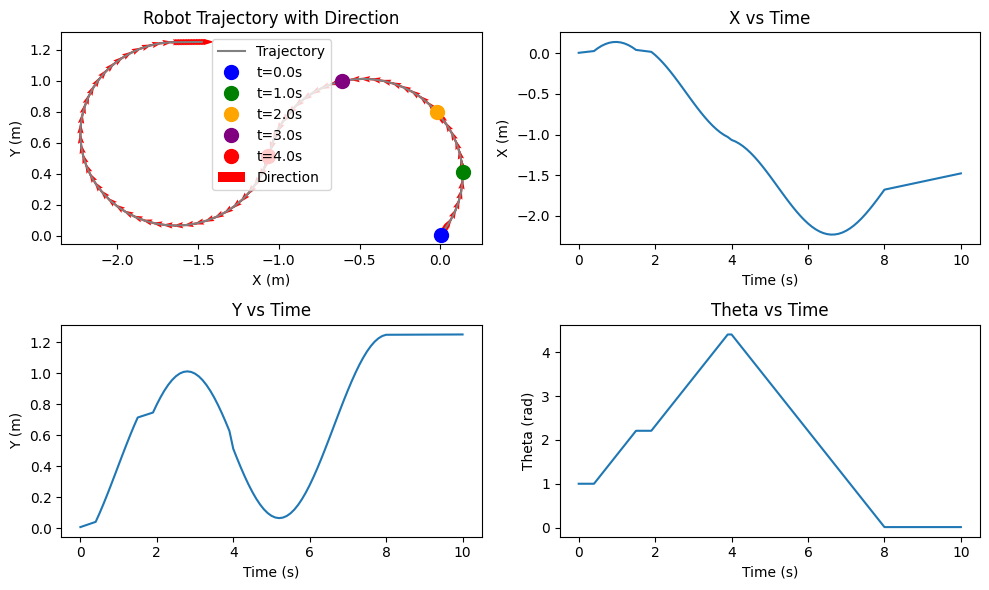

In [23]:
# Time points to plot with different colors
time_points = [0, 1, 2, 3, 4]
# Find the indices corresponding to the time points
indices = [np.where(t_data == t)[0][0] for t in time_points]
# Define colors for each specific time step
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Plot the results with quiver for direction indication
plt.figure(figsize=(10, 6))

# Plot robot trajectory with quiver arrows to indicate direction and time-specific points
plt.subplot(2, 2, 1)
plt.plot(x_data, y_data, label="Trajectory", color='gray')

# Plot the specific time points with different colors and arrows
for i, idx in enumerate(indices):
    plt.plot(x_data[idx], y_data[idx], 'o', color=colors[i], markersize=10, label=f't={t_data[idx]}s')
    plt.quiver(x_data[idx], y_data[idx], np.cos(theta_data[idx]), np.sin(theta_data[idx]),
               scale=30, width=0.005, color=colors[i])

# General trajectory arrows
plt.quiver(x_data[:-1], y_data[:-1], np.cos(theta_data[:-1]), np.sin(theta_data[:-1]),
           scale=30, width=0.005, color='r', label="Direction")

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Robot Trajectory with Direction')
plt.legend()

# X vs Time plot
plt.subplot(2, 2, 2)
plt.plot(t_data, x_data)
plt.xlabel('Time (s)')
plt.ylabel('X (m)')
plt.title('X vs Time')

# Y vs Time plot
plt.subplot(2, 2, 3)
plt.plot(t_data, y_data)
plt.xlabel('Time (s)')
plt.ylabel('Y (m)')
plt.title('Y vs Time')

# Theta vs Time plot
plt.subplot(2, 2, 4)
plt.plot(t_data, theta_data)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Time')

plt.tight_layout()
plt.show()

## HomeWork1 Question 3(b)

<ipython-input-24-151feed2ccf2>:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  highlighted_points[i].set_data(x_data[idx], y_data[idx])


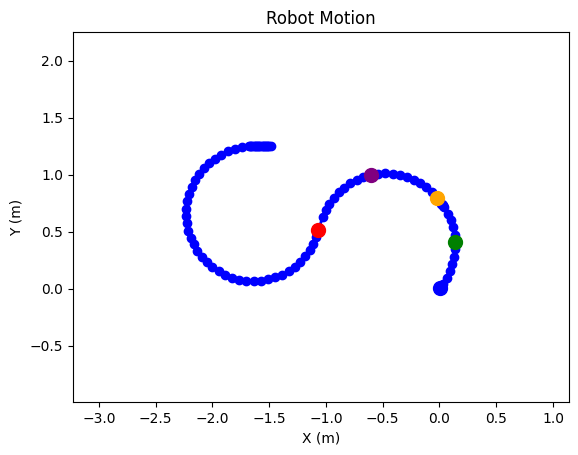

In [24]:
# Animation
fig, ax = plt.subplots()
line, = ax.plot([], [], 'bo-', lw=2)
highlighted_points = [ax.plot([], [], 'o', markersize=10, color=colors[i])[0] for i in range(len(time_points))]

# Initialize function for the animation
def init():
    ax.set_xlim(min(x_data) - 1, max(x_data) + 1)
    ax.set_ylim(min(y_data) - 1, max(y_data) + 1)
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title('Robot Motion')
    return [line] + highlighted_points

# Update function for the animation
def update(frame):
    # Update the main line (trajectory)
    line.set_data(x_data[:frame], y_data[:frame])

    # Update the highlighted points if we are at one of the specific time points
    for i, idx in enumerate(indices):
        if frame >= idx:
            highlighted_points[i].set_data(x_data[idx], y_data[idx])
        else:
            highlighted_points[i].set_data([], [])  # Hide the point until that time

    return [line] + highlighted_points

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(t_data), init_func=init, blit=True)
ani.save('/content/drive/My Drive/HomeWork1_Question_3b_video.mp4', fps=10)

plt.show()

## Recommendation: delta t = 0.2, 0.05 and 0.01

In [25]:
# Simulation parameters
dt_values = [0.2, 0.05, 0.01]
T = 10

In [26]:
# Initial conditions
x = 0
y = 0
theta = 1

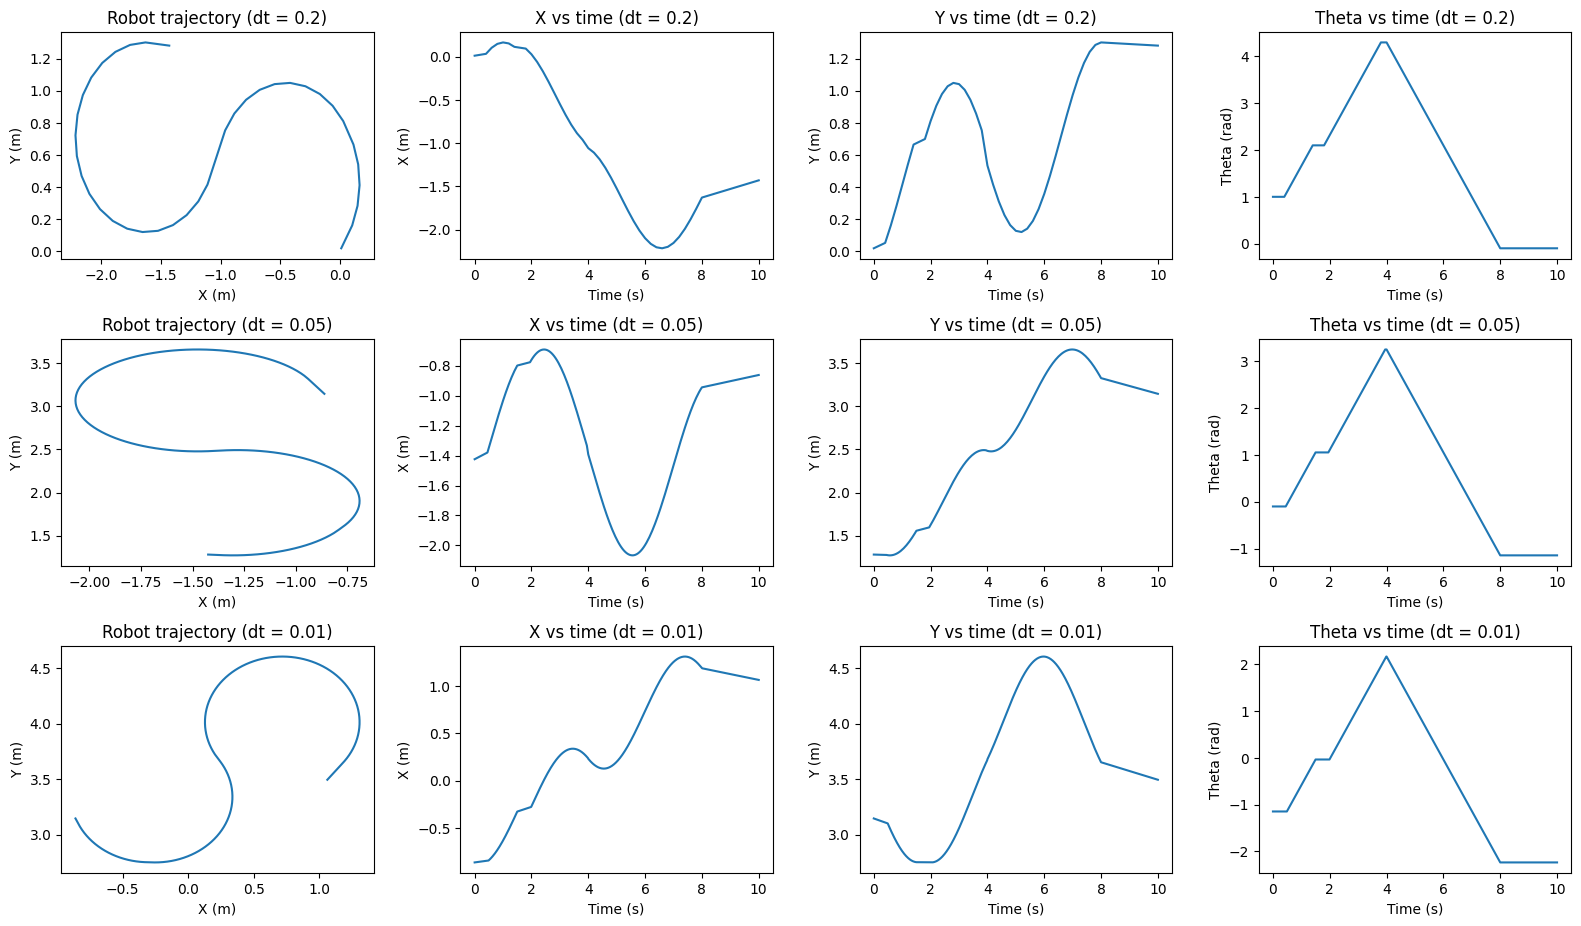

In [27]:
# Plotting setup
plt.figure(figsize=(16, 12))
plot_idx = 1

for dt in dt_values:
    # Time array
    t_data = np.arange(0, T + dt, dt)

    # Control inputs
    wl, wr = control_input(t_data)

    # Initialize data storage
    x_data = np.zeros(len(t_data))
    y_data = np.zeros(len(t_data))
    theta_data = np.zeros(len(t_data))

    # Euler's method loop
    for i in range(len(t_data)):
        x_dot, y_dot, theta_dot = f(x, y, theta, wl[i], wr[i])
        x += x_dot * dt
        y += y_dot * dt
        theta += theta_dot * dt
        x_data[i] = x
        y_data[i] = y
        theta_data[i] = theta

    # Plotting
    plt.subplot(4, 4, plot_idx)
    plt.plot(x_data, y_data)
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title(f'Robot trajectory (dt = {dt})')

    plt.subplot(4, 4, plot_idx + 1)
    plt.plot(t_data, x_data)
    plt.xlabel('Time (s)')
    plt.ylabel('X (m)')
    plt.title(f'X vs time (dt = {dt})')

    plt.subplot(4, 4, plot_idx + 2)
    plt.plot(t_data, y_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Y (m)')
    plt.title(f'Y vs time (dt = {dt})')

    plt.subplot(4, 4, plot_idx + 3)
    plt.plot(t_data, theta_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Theta (rad)')
    plt.title(f'Theta vs time (dt = {dt})')

    plot_idx += 4

plt.tight_layout()
plt.show()